# Credit Card Fraud Detection

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Load the data

In [ ]:
!pip show kaggle

Name: kaggle
Version: 1.5.16
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kartik2112/fraud-detection

100% 202M/202M [00:05<00:00, 44.6MB/s]
100% 202M/202M [00:05<00:00, 37.4MB/s]


In [ ]:
!unzip fraud-detection.zip -d /content/

Archive:  fraud-detection.zip
  inflating: /content/fraudTest.csv  
  inflating: /content/fraudTrain.csv  


In [ ]:
# load the data into train and test dataframes
train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")

## Data Exploration (EDA)

In [ ]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
test_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
len(train_df.columns), len(test_df.columns)

(23, 23)

In [ ]:
train_df.count( )

Unnamed: 0               1296675
trans_date_trans_time    1296675
cc_num                   1296675
merchant                 1296675
category                 1296675
amt                      1296675
first                    1296675
last                     1296675
gender                   1296675
street                   1296675
city                     1296675
state                    1296675
zip                      1296675
lat                      1296675
long                     1296675
city_pop                 1296675
job                      1296675
dob                      1296675
trans_num                1296675
unix_time                1296675
merch_lat                1296675
merch_long               1296675
is_fraud                 1296675
dtype: int64

In [ ]:
test_df.count()

Unnamed: 0               555719
trans_date_trans_time    555719
cc_num                   555719
merchant                 555719
category                 555719
amt                      555719
first                    555719
last                     555719
gender                   555719
street                   555719
city                     555719
state                    555719
zip                      555719
lat                      555719
long                     555719
city_pop                 555719
job                      555719
dob                      555719
trans_num                555719
unix_time                555719
merch_lat                555719
merch_long               555719
is_fraud                 555719
dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
len(train_df["job"].unique())

494

In [ ]:
len(train_df["merchant"].unique())

693

In [ ]:
len(train_df["category"].unique())

14

In [ ]:
len(train_df["job"].unique())

494

## Data preprocessing

In [ ]:
# Check for null values
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
test_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
# Check for duplicate values
train_df.duplicated().sum(), test_df.duplicated().sum()

(0, 0)

In [ ]:
# Converting categorical features into numerical features
columns = ["merchant", "category", "job", "gender"]

le = LabelEncoder()

for i, column in enumerate(columns):
  train_df[column] = le.fit_transform(train_df[column])
  test_df[column] = le.fit_transform(test_df[column])

In [ ]:
# Converting objects to datetime(training_dataset)
train_df["trans_date_trans_time"] = pd.to_datetime(train_df["trans_date_trans_time"])
train_df["dob"] = pd.to_datetime(train_df["dob"])

In [ ]:
# Converting objects to datetime(testing_dataset)
test_df["trans_date_trans_time"] = pd.to_datetime(test_df["trans_date_trans_time"])
test_df["dob"] = pd.to_datetime(test_df["dob"])

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  int64         
 3   merchant               555719 non-null  int64         
 4   category               555719 non-null  int64         
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  int64         
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  int64         
 4   category               1296675 non-null  int64         
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  int64         
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [ ]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,Jennifer,Banks,0,561 Perry Cove,...,36.0788,-81.1781,3495,370,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,241,4,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,428,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,390,0,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,42.1808,-112.2620,4154,307,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,328,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,297,9,41.96,Tyler,Garcia,1,408 Bradley Rest,...,38.4207,-79.4629,99,116,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Visualization

<ipython-input-104-1fb22eb9911b>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][0].set_xticklabels(train_df["trans_date_trans_time"][:10],rotation=45, fontsize=8)


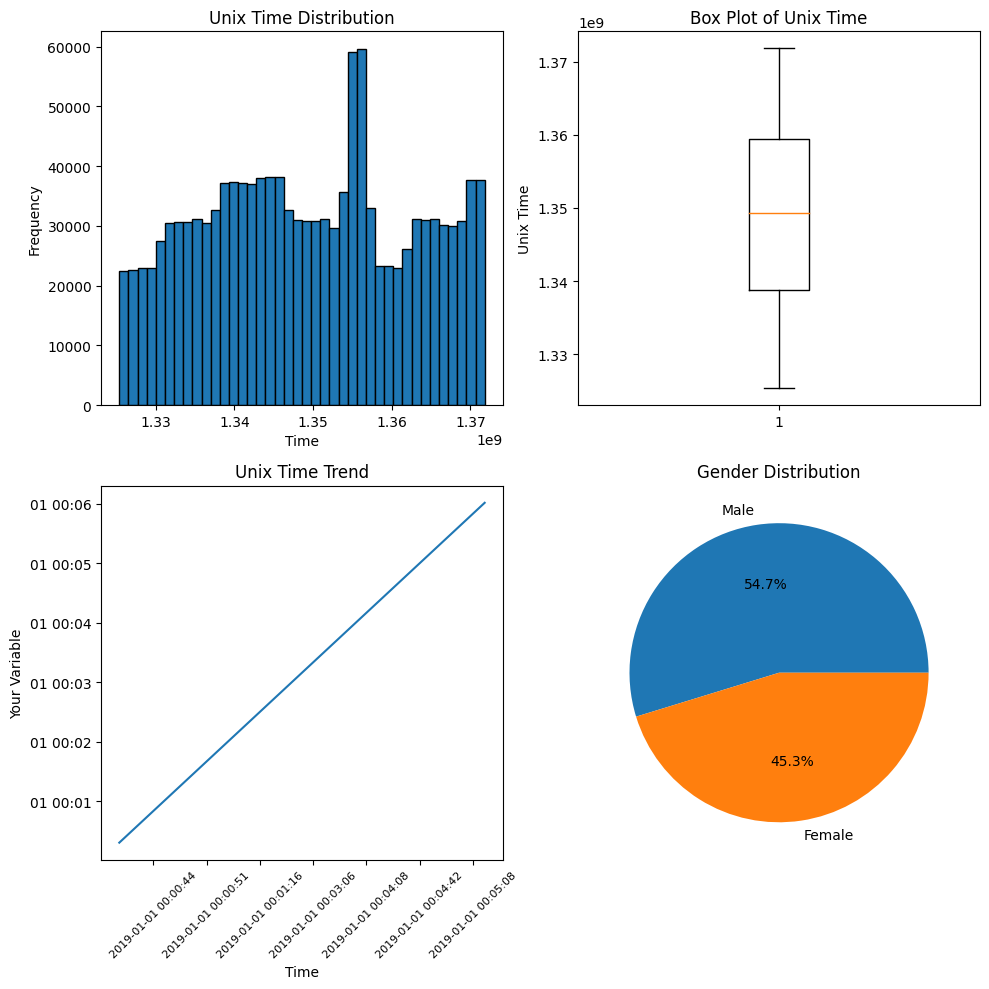

In [ ]:
# Plot Histogram, Line plot, box plot of unix_time column and pie chart for male female distribution

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Histogram
axes[0][0].hist(train_df["unix_time"], bins=40,edgecolor="black")
axes[0][0].set_xlabel('Time')
axes[0][0].set_ylabel('Frequency')
axes[0][0].set_title('Unix Time Distribution')

# Box Plot
axes[0][1].boxplot(train_df["unix_time"])
axes[0][1].set_ylabel('Unix Time')
axes[0][1].set_title('Box Plot of Unix Time')

# Line plot
axes[1][0].plot(train_df['unix_time'][:10], train_df['trans_date_trans_time'][:10])
axes[1][0].set_xlabel('Time')
axes[1][0].set_ylabel('Your Variable')
axes[1][0].set_title('Unix Time Trend')
axes[1][0].set_xticklabels(train_df["trans_date_trans_time"][:10],rotation=45, fontsize=8)

# Scatter plot
axes[1][1].pie(train_df['gender'].value_counts(), labels=["Male", "Female"], autopct='%1.1f%%')
axes[1][1].set_title('Gender Distribution')

plt.tight_layout()

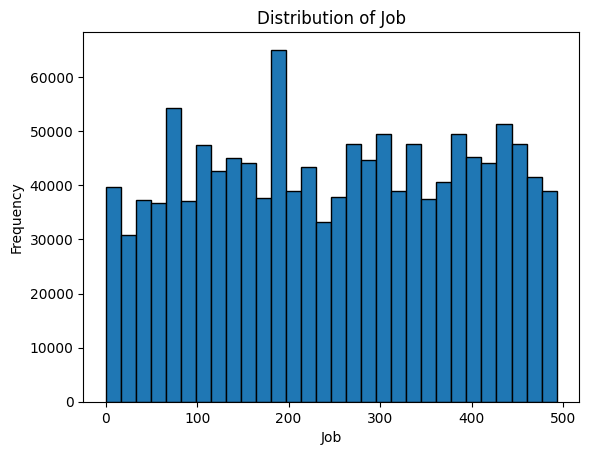

In [ ]:
# Plot histogram for job distribution
plt.hist(train_df['job'], bins=30, edgecolor='black')
plt.xlabel("Job")
plt.ylabel('Frequency')
plt.title('Distribution of Job')
plt.show()

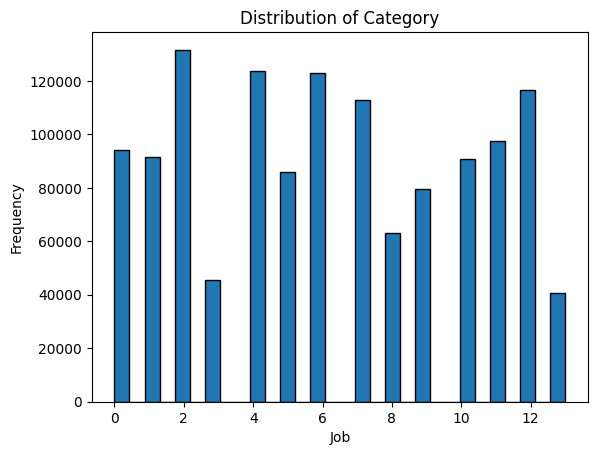

In [ ]:
# Plot histogram for category distribution
plt.hist(train_df['category'], bins=30, edgecolor='black')
plt.xlabel("Job")
plt.ylabel('Frequency')
plt.title('Distribution of Category')
plt.show()

## Extracting Features

In [ ]:
# Extract time features(training dataset)
train_df['day_of_week'] = train_df['trans_date_trans_time'].dt.dayofweek
train_df['hour_of_day'] = train_df['trans_date_trans_time'].dt.hour

In [ ]:
# Extract time features(testing dataset)
test_df['day_of_week'] = test_df['trans_date_trans_time'].dt.dayofweek
test_df['hour_of_day'] = test_df['trans_date_trans_time'].dt.hour

In [ ]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,day_of_week,hour_of_day
0,0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,Jennifer,Banks,0,561 Perry Cove,...,3495,370,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1,0
1,1,2019-01-01 00:00:44,630423337322,241,4,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,149,428,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,0
2,2,2019-01-01 00:00:51,38859492057661,390,0,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,4154,307,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,1,0
3,3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,1939,328,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,0
4,4,2019-01-01 00:03:06,375534208663984,297,9,41.96,Tyler,Garcia,1,408 Bradley Rest,...,99,116,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,1,0


In [ ]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,day_of_week,hour_of_day
0,0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,351 Darlene Green,...,333497,275,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,6,12
1,1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,3638 Marsh Union,...,302,392,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,6,12
2,2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,9333 Valentine Point,...,34496,259,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,6,12
3,3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,...,54767,407,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,6,12
4,4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,...,1126,196,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,6,12


In [ ]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'day_of_week', 'hour_of_day'],
      dtype='object')

In [ ]:
# extracting features
columns=['Unnamed: 0','trans_date_trans_time', 'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num', "is_fraud"]
x_train = train_df.drop(columns=columns)
x_test = test_df.drop(columns=columns)

y_train = train_df["is_fraud"]
y_test = test_df["is_fraud"]

In [ ]:
x_train.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,day_of_week,hour_of_day
0,514,8,4.97,0,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,1,0
1,241,4,107.23,0,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,1,0
2,390,0,220.11,1,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,1,0
3,360,2,45.00,1,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,1,0
4,297,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,1,0


In [ ]:
x_test.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,day_of_week,hour_of_day
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,6,12
1,591,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,6,12
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,6,12
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,6,12
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,6,12


## PCA

In [ ]:
x_train.describe()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,day_of_week,hour_of_day
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,3.428585e+02,6.227787e+00,7.035104e+01,4.525513e-01,3.853762e+01,-9.022634e+01,8.882444e+04,2.511734e+02,1.349244e+09,3.853734e+01,-9.022646e+01,3.070604e+00,1.280486e+01
std,2.009519e+02,3.913443e+00,1.603160e+02,4.977437e-01,5.075808e+00,1.375908e+01,3.019564e+05,1.401094e+02,1.284128e+07,5.109788e+00,1.377109e+01,2.198153e+00,6.817824e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,0.000000e+00,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,0.000000e+00
25%,1.650000e+02,3.000000e+00,9.650000e+00,0.000000e+00,3.462050e+01,-9.679800e+01,7.430000e+02,1.310000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,1.000000e+00,7.000000e+00
50%,3.460000e+02,6.000000e+00,4.752000e+01,0.000000e+00,3.935430e+01,-8.747690e+01,2.456000e+03,2.510000e+02,1.349250e+09,3.936568e+01,-8.743839e+01,3.000000e+00,1.400000e+01
75%,5.140000e+02,1.000000e+01,8.314000e+01,1.000000e+00,4.194040e+01,-8.015800e+01,2.032800e+04,3.740000e+02,1.359385e+09,4.195716e+01,-8.023680e+01,5.000000e+00,1.900000e+01
max,6.920000e+02,1.300000e+01,2.894890e+04,1.000000e+00,6.669330e+01,-6.795030e+01,2.906700e+06,4.930000e+02,1.371817e+09,6.751027e+01,-6.695090e+01,6.000000e+00,2.300000e+01


In [ ]:
# Scale the data

# List of features to scale
features_to_scale = ["amt", "lat", "long", "city_pop", "unix_time", "merch_lat", "merch_long"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
x_train[features_to_scale] = scaler.fit_transform(x_train[features_to_scale])
x_test[features_to_scale] = scaler.fit_transform(x_test[features_to_scale])

## Model Training

### Logistic regression

In [ ]:
# Create a Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# Making predictions on the test set
y_pred = log_reg.predict(x_test)

In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Displaying results
print(f"Accuracy: {accuracy*100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 99.56%
Confusion Matrix:
 [[553262    312]
 [  2145      0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



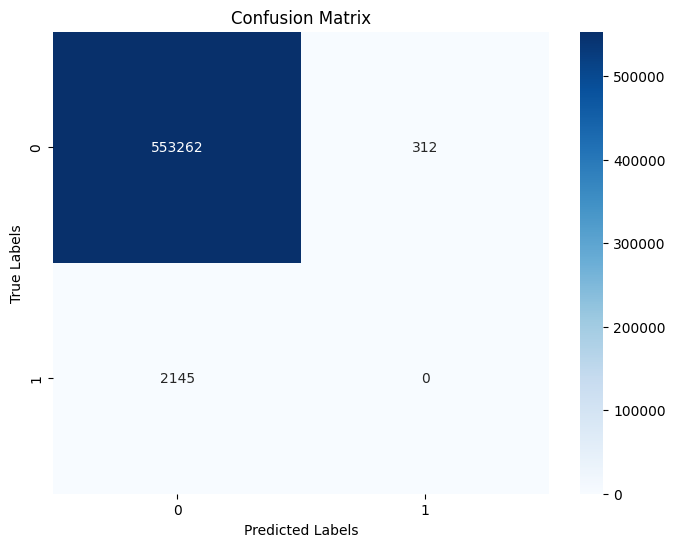

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Creating a sample entry with random values
sample_entry = {
    'merchant': 42,
    'category': 35,
    'amt': 150.0,
    'gender': 1,
    'lat': 37.7749,
    'long': -122.4194,
    'city_pop': 800000,
    'job': 25,
    'unix_time': 1613097600,
    'merch_lat': 37.7849,
    'merch_long': -122.4094,
    'day_of_week': 0,
    'hour_of_day': 8
}

# Converting the sample entry into a DataFrame
sample_df = pd.DataFrame([sample_entry])

In [ ]:
# Make a prediction using the reshaped array
prediction = log_reg.predict(sample_df)
prediction_labels = {0: "Not a fraud",
                     1: "Fruad"}
# Print the prediction
print(f"Predicted Class: {prediction} {prediction_labels[prediction[0]]}")

Predicted Class: [0] Not a fraud


### Decision Tree

In [ ]:
# Creating and training the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Making predictions on the test set
y_pred_dt = dt_model.predict(x_test)

In [ ]:
# Evaluating the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Displaying results
print(f"Accuracy: {accuracy_dt*100:.2f}%")
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", classification_rep_dt)

Accuracy: 99.71%
Confusion Matrix:
 [[552565   1009]
 [   627   1518]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.60      0.71      0.65      2145

    accuracy                           1.00    555719
   macro avg       0.80      0.85      0.82    555719
weighted avg       1.00      1.00      1.00    555719



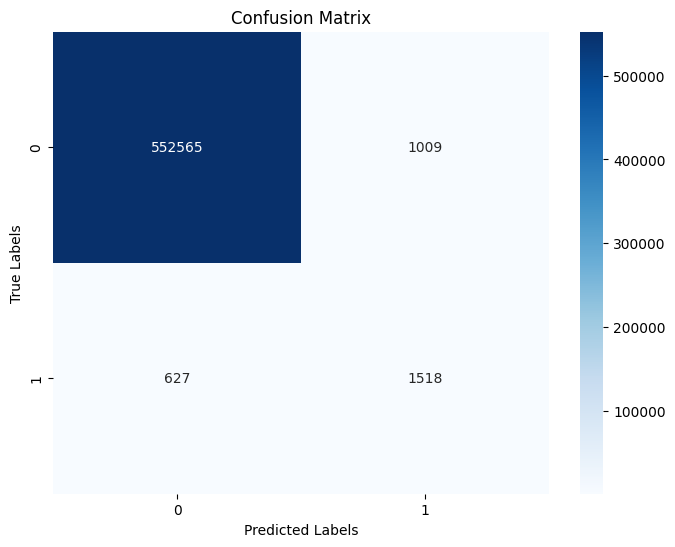

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Prediction on a random entry

# Creating a sample entry with random values
sample_entry = {
    'merchant': 120,
    'category': 46,
    'amt': 198.0,
    'gender': 1,
    'lat': 39.7749,
    'long': -111.4194,
    'city_pop': 900000,
    'job': 56,
    'unix_time': 1613394630,
    'merch_lat': 33.7849,
    'merch_long': -132.4094,
    'day_of_week': 3,
    'hour_of_day': 16
}

# Converting the sample entry into a DataFrame
sample_df = pd.DataFrame([sample_entry])

In [ ]:
# Make a prediction using the reshaped array
prediction = log_reg.predict(sample_df)
prediction_labels = {0: "Not a fraud",
                     1: "Fruad"}
# Print the prediction
print(f"Predicted Class: {prediction} {prediction_labels[prediction[0]]}")

Predicted Class: [0] Not a fraud


### RandomForest

In [ ]:
# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(x_test)

In [ ]:
# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Displaying results
print(f"Accuracy: {accuracy_dt*100:.2f}%")
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", classification_rep_dt)

Accuracy: 99.71%
Confusion Matrix:
 [[552565   1009]
 [   627   1518]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.60      0.71      0.65      2145

    accuracy                           1.00    555719
   macro avg       0.80      0.85      0.82    555719
weighted avg       1.00      1.00      1.00    555719



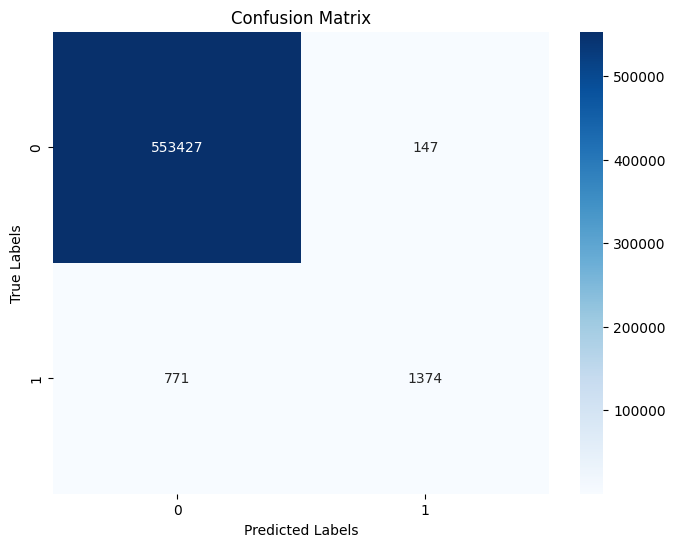

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Prediction on a random entry

# Creating a sample entry with random values
sample_entry = {
    'merchant': 155,
    'category': 306,
    'amt': 255.0,
    'gender': 1,
    'lat': 39.7749,
    'long': -111.4194,
    'city_pop': 450000,
    'job': 56,
    'unix_time': 1613394630,
    'merch_lat': 33.7849,
    'merch_long': -132.4094,
    'day_of_week': 3,
    'hour_of_day': 16
}

# Converting the sample entry into a DataFrame
sample_df = pd.DataFrame([sample_entry])

In [ ]:
# Make a prediction using the reshaped array
prediction_rf = log_reg.predict(sample_df)
prediction_labels = {0: "Not a fraud",
                     1: "Fruad"}
# Print the prediction
print(f"Predicted Class: {prediction} {prediction_labels[prediction[0]]}")

Predicted Class: [0] Not a fraud
